<font size="5">Exploratory Data Analysis</font>  

Google Covid-19 Data

Author: Nicholas

The purpose of this notebook is to perform EDA on 4 data sets which make up the aggregated data set. 

The four data sets I have been assigned are:
1. Demographics
2. Economy
3. Epidemiology
4. Emergency Declarations

# Load Packages


In [1]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
#import cufflinks as cf


%matplotlib inline
sns.set()
sns.set_context("talk")

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Load and Inspect Datasets

# Index dataset

This section will take a look at the structure of the index data frame. 

This dataset seems to be the most important, since the following four data sets all have a `location_key` column. That means that all the information is tied to a given location and it would be good to know what are the different layers of location, (i.e. country, city, subzone.)



## Structure 
of `Index` dataframe


| Name | Type | Description | Example |
| ---- | ---- | ----------- | ------- |
| **key** | `string` | Unique string identifying the region | US_CA_06001 |
| **place_id** | `string` | A textual identifier that uniquely identifies a place in the Google Places database and on Google Maps ([details](https://developers.google.com/places/web-service/place-id))| ChIJd_Y0eVIvkIARuQyDN0F1LBA |
| **wikidata** | `string` | Wikidata ID corresponding to this key | Q107146 |
| **datacommons** | `string` | DataCommons ID corresponding to this key | geoId/06001 |
| **country_code** | `string` | ISO 3166-1 alphanumeric 2-letter code of the country | US |
| **country_name** | `string` | American English name of the country, subject to change | United States of America |
| **subregion1_code** | `string` | (Optional) ISO 3166-2 or NUTS 2/3 code of the subregion | CA |
| **subregion1_name** | `string` | (Optional) American English name of the subregion, subject to change | California |
| **subregion2_code** | `string` | (Optional) FIPS code of the county (or local equivalent) | 06001 |
| **subregion2_name** | `string` | (Optional) American English name of the county (or local equivalent), subject to change | Alameda County |
| **3166-1-alpha-2** | `string` | ISO 3166-1 alphanumeric 2-letter code of the country | US |
| **3166-1-alpha-3** | `string` | ISO 3166-1 alphanumeric 3-letter code of the country | USA |
| **aggregation_level** | `integer` `[0-2]` | Level at which data is aggregated, i.e. country, state/province or county level | 2 |

In [2]:
# read index data
index = pd.read_csv (r'datasets\index.csv')
index.head(3)

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0


In [3]:
# Shape of data
print("The index data frame has", index.shape[0], "rows and",
     index.shape[1], "columns.")

The index data frame has 22963 rows and 15 columns.


## Spread 

of countries

In [4]:
# List all country names, and count how many rows per country
n_countries_df = index.groupby('country_name').agg('count').iloc[:,:1].rename(columns = {'location_key':'count'})

# Sort count in descending order, this gives us the countries with more data
n_countries_df = n_countries_df.sort_values('count', ascending = False)

# Top 3 countries
n_countries_df.head(3)

,count
country_name,
Brazil,5616
United States of America,3285
Mexico,2498


In [5]:
# Exploring how the subzones are named
# Is there a way to group all the countries with multiple subzones together?
# Ans:group by country code

index['location_key'].unique

index.iloc[22960,]

location_key                            ZA_WC_DC5
place_id              ChIJg-OB74w21R0RumMhJW3W6wE
wikidata_id                              Q1053888
datacommons_id                                NaN
country_code                                   ZA
country_name                         South Africa
subregion1_code                                WC
subregion1_name                      Western Cape
subregion2_code                               DC5
subregion2_name                     Central Karoo
locality_code                                 NaN
locality_name                                 NaN
iso_3166_1_alpha_2                             ZA
iso_3166_1_alpha_3                            ZAF
aggregation_level                               2
Name: 22960, dtype: object

## All country codes/names

In [6]:
# country_level index 
index_country_level = index[['location_key','country_code','country_name']]
all_countries = index_country_level.groupby(['country_code','country_name']).agg('count').reset_index()
print(all_countries.iloc[:,:2].to_string())

    country_code                                  country_name
0             AD                                       Andorra
1             AE                          United Arab Emirates
2             AF                                   Afghanistan
3             AG                           Antigua and Barbuda
4             AI                                      Anguilla
5             AL                                       Albania
6             AM                                       Armenia
7             AN                          Netherlands Antilles
8             AO                                        Angola
9             AQ                                    Antarctica
10            AR                                     Argentina
11            AS                                American Samoa
12            AT                                       Austria
13            AU                                     Australia
14            AW                                       

In [7]:
# Index subregion

In [8]:
index[index['country_code'] == 'GB'].groupby(['subregion1_name','subregion1_code']).agg("count").reset_index()

,subregion1_name,subregion1_code,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,"East Midlands, England",UKF,1,1,1,1,1,1,0,0,0,0,1,1,1
1,East of England,UKH,1,1,1,1,1,1,0,0,0,0,1,1,1
2,England,ENG,152,131,152,48,152,152,150,150,1,1,152,152,152
3,London Region,UKI,1,1,1,1,1,1,0,0,0,0,1,1,1
4,North East England,UKC,1,1,1,1,1,1,0,0,0,0,1,1,1
5,North West England,UKD,1,1,1,1,1,1,0,0,0,0,1,1,1
6,Northern Ireland,NIR,12,12,12,2,12,12,11,11,0,0,12,12,12
7,Scotland,SCT,15,1,1,1,15,15,14,14,0,0,15,15,15
8,South East England,UKJ,1,0,1,1,1,1,0,0,0,0,1,1,1
9,South West England,UKK,1,1,1,1,1,1,0,0,0,0,1,1,1


In [9]:
# Number of unique place ids
index['place_id'].nunique()

21618

In [10]:
# Save the top 30 countries ranked in terms of data collected
# countries_1 = 
countries_top = n_countries_df.iloc[:30,].reset_index()
display(countries_top)

# Visualise how many unique places (placeids) per country


,country_name,count
0,Brazil,5616
1,United States of America,3285
2,Mexico,2498
3,Peru,1901
4,Israel,1486
5,Spain,1398
6,Colombia,1156
7,India,754
8,Indonesia,549
9,Argentina,545


[Text(0.5, 0, 'Country Names'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Number of unique placeids per country')]

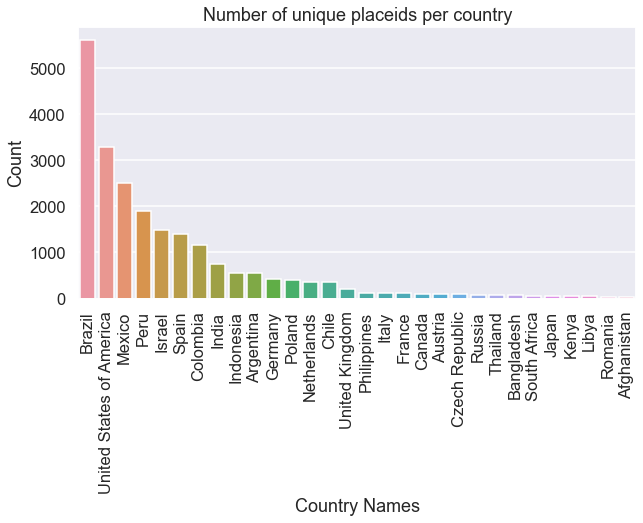

In [11]:
fig, axes = plt.subplots(1, 1, sharey=True, figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(ax = axes, data=countries_top, x="country_name", y= 'count')


axes.set(xlabel='Country Names', ylabel='Count', title='Number of unique placeids per country')

The barplot above shows that within the index data frame, how fine-grain the data in each country is. The more rows there are, means unique locations in the country are recorded. 

# Demographic Dataset

## Structure
| Name | Type | Description | Example |
| ---- | ---- | ----------- | ------- |
| **key** | `string` | Unique string identifying the region | KR |
| **population** | `integer` | Total count of humans | 51606633 |
| **population_male** | `integer` | Total count of males | 25846211 |
| **population_female** | `integer` | Total count of females | 25760422 |
| **rural_population** | `integer` | Population in a rural area | 9568386 |
| **urban_population** | `integer` | Population in an urban area | 42038247 |
| **largest_city_population** | `integer` | Population in the largest city of the region | 9963497 |
| **clustered_population** | `integer` | Population in urban agglomerations of more than 1 million | 25893097 |
| **population_density** | `double` `[persons per squared kilometer]` | Population per squared kilometer of land area | 529.3585 |
| **human_development_index** | `double` `[0-1]` | Composite index of life expectancy, education, and per capita income indicators | 0.903 |
| **population_age_`${lower}`_`${upper}`\*** | `integer` | Estimated population between the ages of `${lower}` and `${upper}`, both inclusive | 42038247 |
| **population_age_80_and_older\*** | `integer` | Estimated population over the age of 80 | 477081 |

In [12]:
demo = pd.read_csv (r'datasets\demographics.csv')
demo.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets\\demographics.csv'

In [ ]:
# merge demographic df with country-level index df
# df = df.reindex(columns=['mean',0,1,2,3,4])
demo_index= demo
demo_index = index_country_level.merge(demo)
demo_index.head(2)

#sort demographic df 
demo_country = demo_index.groupby('country_name').agg('sum').sort_values('population_rural', ascending = False).reset_index()
demo_country.head(3)

## Gender

In [ ]:
# Distribution by gender
demo_gender = demo_country[['country_name','population','population_male','population_female']]
demo_gender.head(3)

In [ ]:
# Use heatmap to visualise ratio of male to female population?
demo_gender['male_female_ratio'] = demo_gender['population_male']/demo_gender['population_female']
demo_gender.sort_values('male_female_ratio', ascending = False).head(10)

The dataframe above shows the 10 most male-dominated countries. 

## Rural/urban

In [ ]:
demo_geo = demo_country[['country_name','population_rural','population_urban','population_largest_city']]
demo_geo.head(3)

## Age

In [ ]:
# Shape of data
print("The demographics data frame has", demo.shape[0], "rows and",
     demo.shape[1], "columns.")

In [ ]:
demo_country.head()
# .groupby('location_key').agg('count')

# Economy Dataset

In [ ]:
econ = pd.read_csv(r'datasets\economy.csv')
econ.head(3)

# Epidemiology Dataset

In [ ]:
epid = pd.read_csv(r'datasets\epidemiology.csv')
epid.head(3)

## Country-level

In [ ]:
# merge with merge with country-level index df
epid_country =  index_country_level.merge(epid)

# sum up the country's stats 
epid_country = epid_country.groupby(['country_name','country_code','date']).agg('sum').reset_index()

In [ ]:
epid_country

In [ ]:
# Let's use Singapore and US as an examples 
# display the time series of the columns as a time series
# epid_US = epid_country['country_code' == 'US']
epid_country.dtypes

convert_dict = {'country_code':str,
}

epid_country = epid_country.astype(convert_dict)
epid_country.dtypes

## UK Epidemiology

In [ ]:
import time

start_time = time.monotonic()



epid_UK = epid_country[(epid_country["country_code"] == 'GB')]
print('seconds: ', time.monotonic() - start_time)
epid_UK.head()


In [ ]:
import plotly.express as px

fig = px.line(epid_UK, x='date', y=epid_UK.columns[3:-4])
fig.show()

# Emergency Declaration Dataset

In [ ]:
emer_d = pd.read_csv(r'datasets\emerg_declar.csv')
emer_d.head(3)

In [ ]:
emer_d['location_key'].unique()

# Government Response

In [ ]:
gov_res = pd.read_csv(r'datasets\government-response.csv')
gov_res.shape

In [ ]:
gov_res

## Country-level

In [ ]:
gov_res_country = index_country_level.merge(gov_res)
restrictions_sum = gov_res_country.groupby('country_name').agg('sum')
restrictions_sum.head()

In [ ]:
gov_res_country

## UK Government Response

In [ ]:
gov_res_UK = gov_res_country[(gov_res_country["country_code"] == 'GB')]
gov_res_UK.head(3)

In [ ]:
# Filter for only England, code ENG
eng_response = gov_res_UK[(gov_res_UK['location_key'] == "GB_ENG")]
# Summarise by month

eng_res_month = england_response.groupby('date').agg('mean').reset_index()
eng_res_month.head(5)

In [ ]:
# eng_res_month.index
eng_res_month.dtypes
# eng_res_month['month'] = eng_res_month.index.month
# eng_res_month['year'] = eng_res_month.index.year
eng_res_month['date'] = pd.to_datetime(eng_res_month['date'], infer_datetime_format = True)
eng_res_month = eng_res_month.set_index('date')
eng_res_month['day'] = eng_res_month.index.day
eng_res_month['month'] = eng_res_month.index.month
eng_res_month['year'] = eng_res_month.index.year


In [ ]:
eng_res_month = eng_res_month.reset_index()

In [ ]:
import plotly.express as px
# eng_res_month = eng_res_month.data.stocks()
fig = px.line(eng_res_month, x="date", y=eng_res_month.columns[3:-3],
              width=800, height=400)
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=eng_res_month['month'], y=eng_res_month.columns[2:-1])])
fig.show()

In [ ]:
# epid[(epid["location_key" == "GB_ENG"])]
epid[(epid['location_key'] == "GB_ENG")]

## K-means attempt

In [ ]:
# Merge all the subzones/counties into the countries to make comparison easier.
gov_res_country_date = gov_res_country.groupby(['country_code','date']).agg('mean').reset_index()

# After groupby, agg, I have 186 countries
len(gov_res_country_date['country_code'].unique())

gov_res_country_date.head(3)

In [ ]:
# I need to find a way to aggregate/measure the types of policies
# Perhaps do a clustering algo? 
from sklearn.cluster import KMeans
model = KMeans()
clustering = KMeans().fit(gov_res_country_date)

In [ ]:
restrictions_sum.sort_values('workplace_closing', ascending = False)

# Hospitalization

In [ ]:
hospitalization = pd.read_csv(r'datasets\hospitalizations.csv')
hospitalization